In [1]:
# importing required libraries 
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd 

# 1- chargement des données

In [2]:
dataset = pd.read_csv("corona.csv",sep=';') 

In [4]:
# affichage des 10 premières enregistrement du jeu de données
dataset.head(10)

,Date,Pays,Infections,Deces,Guerisons,TauxDeces,TauxGuerison,TauxInfection
0,16/04/2020,Afghanistan,840,30,54,3.57,6.43,90.00
1,16/04/2020,Albanie,518,26,277,5.02,53.47,41.51
2,16/04/2020,Angola,19,2,5,10.53,26.32,63.16
3,16/04/2020,Argentine,2571,112,596,4.36,23.18,72.46
4,16/04/2020,Autriche,14412,393,8098,2.73,56.19,41.08
5,16/04/2020,Australie,6462,63,2355,0.97,36.44,62.58
6,16/04/2020,Barbade,75,5,15,6.67,20.00,73.33
7,16/04/2020,Bangladesh,1572,60,49,3.82,3.12,93.07
8,16/04/2020,Belgique,34809,4857,7562,13.95,21.72,64.32
9,16/04/2020,Burkina Faso,542,32,226,5.90,41.70,52.40


In [63]:
# X est la matrice contenant les variable quantitatives
# Y est la matrice contenant les variables qualitative
X=dataset[['Infections','Deces','Guerisons','TauxDeces','TauxGuerison','TauxInfection']]
Y = dataset[['Date','Pays']]
name=dataset.index


In [6]:
# affichage des 10 premières ligne de X 
X.head(10)

,Infections,Deces,Guerisons,TauxDeces,TauxGuerison,TauxInfection
0,840,30,54,3.57,6.43,90.00
1,518,26,277,5.02,53.47,41.51
2,19,2,5,10.53,26.32,63.16
3,2571,112,596,4.36,23.18,72.46
4,14412,393,8098,2.73,56.19,41.08
5,6462,63,2355,0.97,36.44,62.58
6,75,5,15,6.67,20.00,73.33
7,1572,60,49,3.82,3.12,93.07
8,34809,4857,7562,13.95,21.72,64.32
9,542,32,226,5.90,41.70,52.40


In [7]:
# affichage des 10 premières ligne de Y
Y.head(10)

,Date,Pays
0,16/04/2020,Afghanistan
1,16/04/2020,Albanie
2,16/04/2020,Angola
3,16/04/2020,Argentine
4,16/04/2020,Autriche
5,16/04/2020,Australie
6,16/04/2020,Barbade
7,16/04/2020,Bangladesh
8,16/04/2020,Belgique
9,16/04/2020,Burkina Faso


# 2- centrer et réduire la matrice des données X

In [11]:
# importer le module standard_scaler de la bibliothèque sklearn qui va permettre de réduire et centrer la matrice X
from sklearn.preprocessing import StandardScaler
x_centre_reduit = StandardScaler().fit_transform(X)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [14]:
 #affichage de la matrice centrée réduite 
x_centre_reduit

array([[-0.2573869 , -0.2634156 , -0.30006373, -0.16672745, -0.82439513,
         0.86668303],
       [-0.2631636 , -0.26438038, -0.28501103,  0.16969727,  1.32743   ,
        -1.37583497],
       [-0.27211568, -0.27016905, -0.30337128,  1.44811122,  0.0854646 ,
        -0.37458699],
       ...,
       [-0.26065199, -0.26558635, -0.29797121, -0.25489393, -0.52751279,
         0.58411374],
       [-0.27159542, -0.27041024, -0.30310127, -0.51243286, -0.26082188,
         0.3658278 ],
       [-0.23614588, -0.24001975, -0.28825108,  0.45971858, -0.60116157,
         0.51566815]])

# 3- Matrice de corrélation

In [16]:
#affichage de la matrice de corrélation déduite à partir de la matrice initiale de données X
print(X.corr())

               Infections     Deces  Guerisons  TauxDeces  TauxGuerison  \
Infections       1.000000  0.887413   0.678964   0.195899      0.064463   
Deces            0.887413  1.000000   0.639360   0.338549      0.023767   
Guerisons        0.678964  0.639360   1.000000   0.161213      0.358060   
TauxDeces        0.195899  0.338549   0.161213   1.000000     -0.153455   
TauxGuerison     0.064463  0.023767   0.358060  -0.153455      1.000000   
TauxInfection   -0.104259 -0.091545  -0.394168  -0.044167     -0.980414   

               TauxInfection  
Infections         -0.104259  
Deces              -0.091545  
Guerisons          -0.394168  
TauxDeces          -0.044167  
TauxGuerison       -0.980414  
TauxInfection       1.000000  


# 4- Calcul des valeurs et vecteurs propres 

In [17]:
eig_vals, eig_vecs = np.linalg.eig(X.corr())

In [18]:
# affichage des vecteurs propres 
print('Eigenvectors \n%s' %eig_vecs)

Eigenvectors 
[[-4.96066208e-01 -3.05451707e-01  2.57026572e-01 -3.08712443e-01
  -7.06577342e-01  6.13577841e-06]
 [-4.91591480e-01 -3.44719967e-01  8.53764036e-02 -3.87291535e-01
   6.94422132e-01  1.61059101e-05]
 [-5.20645463e-01 -2.70675218e-02  1.51034499e-01  8.37245175e-01
   6.63682724e-02  1.68830120e-05]
 [-1.78193993e-01 -2.74991986e-01 -9.25416093e-01  5.65383935e-02
  -1.17350196e-01  1.38793751e-01]
 [-3.03575342e-01  6.19972731e-01 -3.08540582e-02 -1.63611856e-01
   5.38477883e-03  7.04078132e-01]
 [ 3.42451965e-01 -5.71968503e-01  2.15615105e-01  1.54133000e-01
   1.79318194e-02  6.96426793e-01]]


In [19]:
# affichage des vecteurs propres 
print('\nEigenvalues \n%s' %eig_vals)


Eigenvalues 
[2.77380653e+00 1.91195853e+00 8.93220330e-01 3.22246355e-01
 9.87682284e-02 2.35267181e-08]


In [21]:
# on réduit les dimmensions à 2  car la portionde  l'inertie exprimée par l'axe 1 et 2 est égale à 78%
(eig_vals[0] + eig_vals[1]) / sum(eig_vals)

0.7809608437545636

# 5-Projection des données sur les deux nouveaux composantes (les deux vecteurs propres)

In [22]:
#import des bibliothèques nécessaires
from sklearn import decomposition
from sklearn import preprocessing

In [23]:
#spécifier le nombre de composants qui est égale à 2 dans ce cas
nbr_composants=2

In [27]:
#appliquer la réduction à 2 dimmension 
pca = decomposition.PCA(n_components=nbr_composants)

In [29]:
# Calcul des coordonnées de chaque individu sur les 2 composantes 
proj=pca.fit_transform(x_centre_reduit)   # x_centre_reduit est la matrice centrée réduite obtenue à partir 
                                           #de la matrice des variables quantitatives calcuké précédemment

In [33]:
# visualisation de la matrice de projection 
p=pd.DataFrame(data=proj,columns=['composant1','composant2'])
print(p)

     composant1  composant2
0     -0.990174    0.783423
1      0.495468   -1.742475
2     -0.013481   -0.053481
3     -0.402943   -0.087881
4      0.887398   -1.856158
5     -0.111849   -0.921113
6     -0.420695    0.149067
7     -1.064529    0.980950
8      1.196512    0.933983
9      0.195065   -1.063929
10    -0.649153    0.325612
11    -0.103691   -1.247414
12    -0.254578    1.742457
13    -0.920034    1.072195
14    -0.197233    0.939181
15    -0.209282   -1.197131
16    -1.016717    1.244623
17    -0.762686    1.410561
18     0.437315   -0.358325
19    -0.872617    0.640393
20     1.534793   -1.752170
21    -0.089981   -0.849411
22    -0.690210    0.009745
23     5.512799   -3.167405
24    -0.665227    0.383615
25    -1.035323    0.436626
26    -0.662901    0.095477
27    -1.242314    0.964728
28    -1.022040    0.564868
29     4.817685   -0.835925
..          ...         ...
170    4.326896    2.575914
171   -1.177300    0.768483
172    1.773999    3.082587
173   -1.398245    0

# 6-Visualisation du cercle de corrélation et projection  des individus



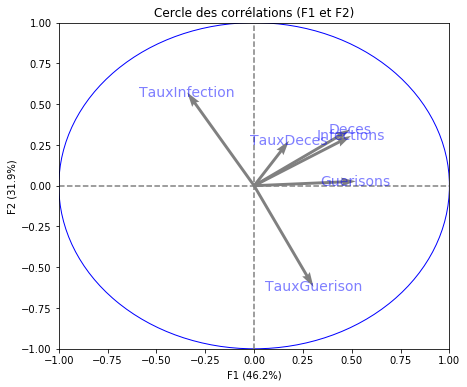

In [75]:
#import d'un fichier python qui contient les fonctions pour visualiser le cercle de corrélation
from fonctions import *
# Cercle des corrélations
pcs = pca.components_
display_circles(pcs, nbr_composants, pca, [(0,1),(2,3),(4,5)], labels = np.array(X.columns))

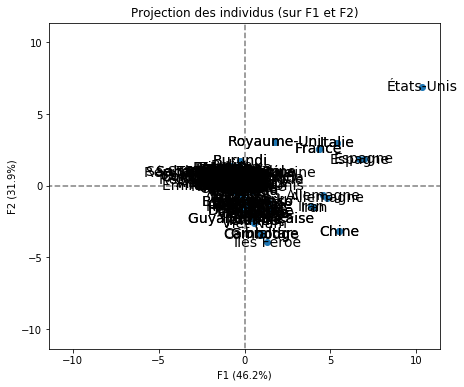

In [76]:
names = dataset.Pays
X_projected = pca.transform(x_centre_reduit)
display_factorial_planes(X_projected, nbr_composants, pca, [(0,1),(2,3),(4,5)] ,labels = np.array(names))


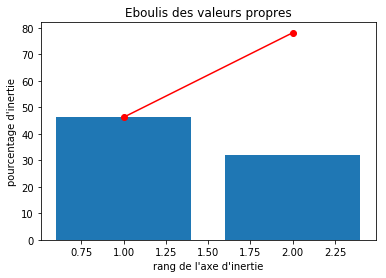

In [53]:
display_scree_plot(pca)